## Group 9

# Import the right package

In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from factor_analyzer import FactorAnalyzer
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn import preprocessing

# Dataset

In [2]:
data = pd.read_excel('August_group9.xlsx',index_col='Year')
# data.reset_index(drop=True)

# 1- Cluster Analysis

# Standardization of the dataset

In [3]:
standard = preprocessing.scale(data)
coldata = data.columns

# Single Linkage

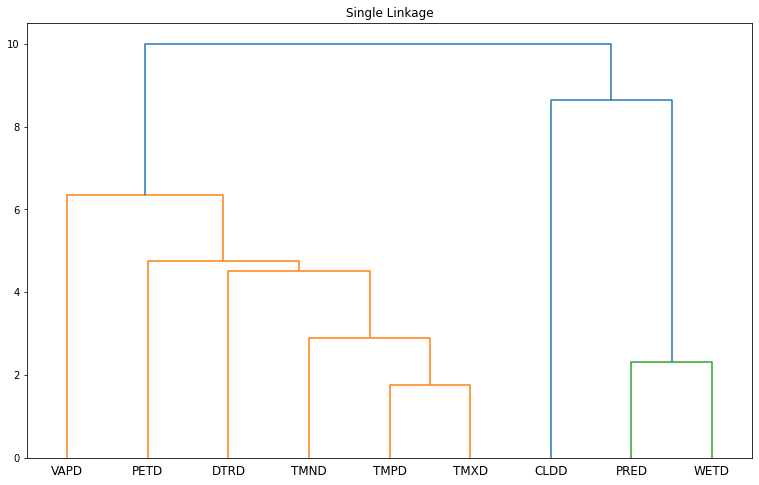

In [4]:
Singlelink = linkage(standard.T,'single')
fig = plt.figure(figsize=(13,8))
plt.title('Single Linkage')
figsinglelinkage = dendrogram(Singlelink,labels=coldata)
plt.savefig('singlelink.png')

# Average Linkage

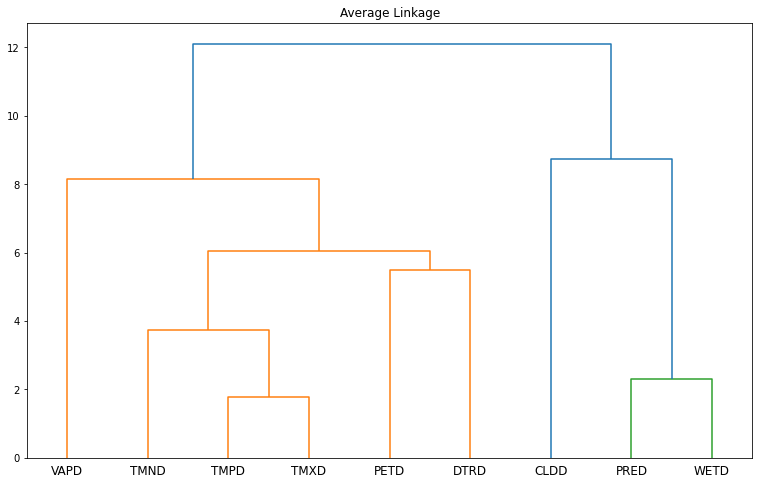

In [5]:
Averagelink = linkage(standard.T,'average')
fig = plt.figure(figsize=(13,8))
plt.title('Average Linkage')
figAveragelinkage = dendrogram(Averagelink,labels=coldata)
plt.savefig('averagelink.png')

# Ward Algorithm

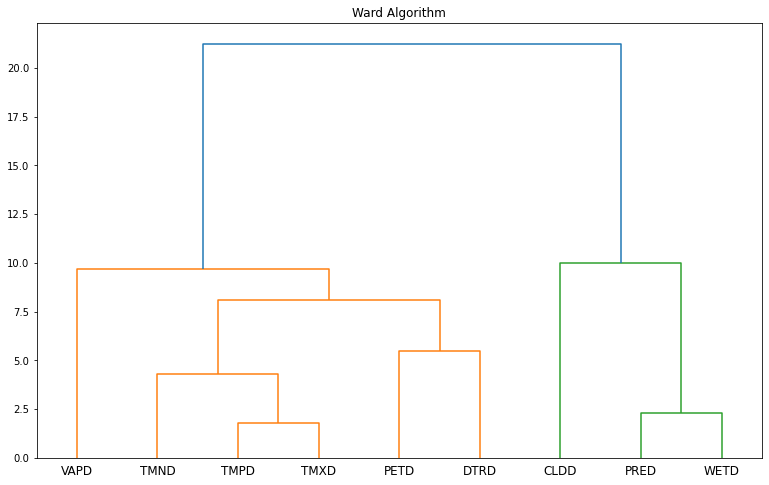

In [6]:
WardAlg = linkage(standard.T,'ward')
fig = plt.figure(figsize=(13,8))
plt.title('Ward Algorithm')
fig = dendrogram(WardAlg,labels=coldata)
plt.savefig('wardalgo.png')

# 2- Principal Component Analysis

# Read the dataset in python as a pandas dataframe

In [7]:

pca=pd.read_excel("August_group9.xlsx",)
pca=pca.set_index('Year')

# Performing preprocessing part by standardizing the dataset


In [8]:
stand=scale(pca)
stand.shape

(51, 9)

# get unrotated PCA

In [9]:
sc = StandardScaler()
X_scaled = sc.fit_transform(pca)


fa = FactorAnalyzer(n_factors=2, rotation=None, method="principal", 
                    is_corr_matrix=False)
fa.fit(X_scaled)

FactorAnalyzer(method='principal', n_factors=2, rotation=None,
               rotation_kwargs={})

In [10]:
unrotatedloading_matrix = pd.DataFrame(fa.loadings_, columns=['PF1', 'PF2'], index=pca.columns)
a, b ,c= fa.get_factor_variance()
row1=pd.DataFrame(a,columns=['Expl.Var'],index=['PF1', 'PF2']).T
row2=pd.DataFrame(b,columns=['Prp.Totl'],index=['PF1', 'PF2']).T
pca2 = pd.concat([unrotatedloading_matrix,row1,row2], ignore_index=False)

In [11]:
pca2.style.applymap(lambda x: 'color : red' if abs(x)>0.7and x<1 else '')

,PF1,PF2
PRED,-0.826958,0.079907
PETD,0.860900,-0.386845
CLDD,-0.442369,0.609151
DTRD,0.733207,-0.327443
TMPD,0.946713,0.278538
TMND,0.798167,0.518234
TMXD,0.960070,0.115559
VAPD,0.345707,0.754576
WETD,-0.819035,0.171509
Expl.Var,5.403693,1.592623


### Scores

In [12]:
scoreunrotated = pd.DataFrame(fa.transform(X_scaled), columns=['PF1', 'PF2'],index=pca.index)
scoreunrotated

,PF1,PF2
Year,,
1960,0.181263,-1.383906
1961,-1.348897,-1.125707
1962,-1.373422,-1.152535
1963,-0.400774,-0.255433
1964,-1.663505,-1.045979
1965,-0.845882,-0.851287
1966,0.365198,-0.672220
1967,-1.299637,-0.521031
1968,1.487942,-0.600529


## Rotated PCA

In [13]:
farotated = FactorAnalyzer(n_factors=2, rotation='varimax', method="principal", 
                    is_corr_matrix=False)
farotated.fit(X_scaled)

FactorAnalyzer(method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={})

In [14]:
rotatedloading_matrix = pd.DataFrame(farotated.loadings_, columns=['PF1', 'PF2'], index=pca.columns)
a2, b2 ,c2= farotated.get_factor_variance()
row3=pd.DataFrame(a2,columns=['Expl.Var'],index=['PF1', 'PF2']).T
row4=pd.DataFrame(b2,columns=['Prp.Totl'],index=['PF1', 'PF2']).T
pca3 = pd.concat([rotatedloading_matrix,row3,row4], ignore_index=False)

In [15]:
pca3.style.applymap(lambda x: 'color : red' if abs(x)>0.7and x<1 else '')

,PF1,PF2
PRED,-0.714098,-0.424627
PETD,0.922991,0.197192
CLDD,-0.716969,0.229590
DTRD,0.784892,0.169574
TMPD,0.598682,0.784493
TMND,0.337142,0.889928
TMXD,0.705839,0.660969
VAPD,-0.167485,0.812925
WETD,-0.761883,-0.346075
Expl.Var,4.070760,2.925556


### Scores

In [16]:
scorerotated = pd.DataFrame(farotated.transform(X_scaled), columns=['PF1', 'PF2'],index=pca.index)
scorerotated

,PF1,PF2
Year,,
1960,0.964608,-1.008754
1961,-0.421980,-1.705484
1962,-0.425890,-1.741621
1963,-0.172113,-0.442993
1964,-0.722824,-1.827251
1965,-0.178651,-1.186714
1966,0.692038,-0.326087
1967,-0.739862,-1.188753
1968,1.554997,0.395714


# Scree plot

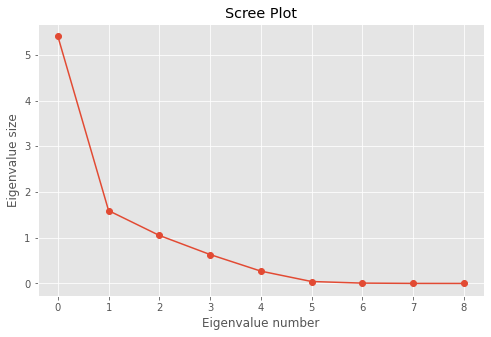

In [17]:
plt.style.use("ggplot")
plt.figure(figsize=(8,5))
plt.plot(fa.get_eigenvalues()[0], marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")
plt.savefig('screeplot.png')